In [1]:
import sys
sys.path.append('./')
import torch
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cv2 as cv

In [74]:
i = 912

Text(0.5, 1.0, '912.mat')

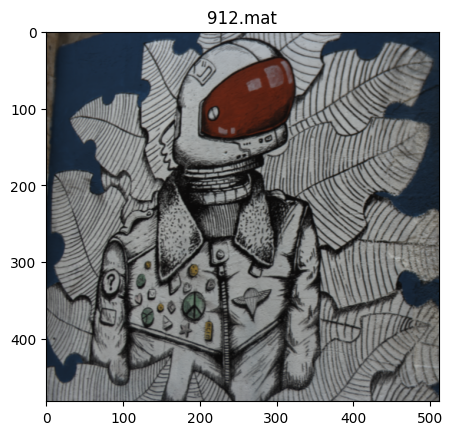

In [75]:
root = '/work3/s212645/Spectral_Reconstruction/clean/ARAD/'
name = str(i).zfill(3) + '.mat'
mat = scipy.io.loadmat(f'{root}{name}')
rgb = mat['rgb']
ycrcb = mat['ycrcb']
plt.imshow(rgb)
plt.title(name)

In [80]:
Y, Cr, Cb = cv.split(ycrcb)

hh, ww = ycrcb.shape[:2]
# Fill Y and Cb with 128 (Y level is middle gray, and Cb is "neutralized").
gray = np.full((hh,ww), 128, dtype=np.uint8)

# invert Cr and Cb
Cr_inv = cv.bitwise_not(Cr)
Cb_inv = cv.bitwise_not(Cb)

# combine channels to get the Cr and Cb colorized images as if BGR
Cr_colored = cv.merge([gray, Cr_inv, Cr])
Cb_colored = cv.merge([Cb, Cb_inv, gray])
Y_colored = cv.merge([Y, Y, Y])

# save results
cv.imwrite('Y.png', Y_colored)
cv.imwrite('Cr.png', Cr_colored)
cv.imwrite('Cb.png', Cb_colored)


True

In [104]:
def no_white_pad(path, name):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    print(img.shape)
    for i in range(img.shape[0]):
        if img[i,200,:].mean() != 255:
            h_min = i
            break
    for i in reversed(range(img.shape[0])):
        if img[i,200,:].mean() != 255:
            h_max = i
            break
    for i in range(img.shape[1]):
        if img[200,i,:].mean() != 255:
            w_min = i
            break
    for i in reversed(range(500)):
        if img[200,i,:].mean() != 255:
            w_max = i
            break
    # plt.imshow(img[h_min:h_max,w_min:w_max,:])
    # plt.axis('off')
    # plt.savefig(name, bbox_inches='tight', pad_inches=0)
    # plt.close()
    return img[h_min:h_max,w_min:w_max,:]
    

In [124]:
mrae = []
deltae = []
sam = []

path = 'heatmap/MSTPlusPlus/ARAD-3-mrae.png'
name = 'figures/MSTPlusPlus-ARAD-3-mrae.png'
mrae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-3-deltaE.png'
name = 'figures/MSTPlusPlus-ARAD-3-deltaE.png'
deltae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-3-sam.png'
name = 'figures/MSTPlusPlus-ARAD-3-sam.png'
sam.append(no_white_pad(path, name))

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [125]:
path = 'heatmap/MSTPlusPlus/ARAD-9-DELTAE.png'
name = 'figures/MSTPlusPlus-ARAD-9-DELTAE.png'
mrae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-9-deltaE.png'
name = 'figures/MSTPlusPlus-ARAD-9-deltaE.png'
deltae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-9-sam.png'
name = 'figures/MSTPlusPlus-ARAD-9-sam.png'
sam.append(no_white_pad(path, name))

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [126]:
path = 'heatmap/Restormer/ARAD-18-mrae.png'
name = 'figures/Restormer-ARAD-18-mrae.png'
mrae.append(no_white_pad(path, name))
path = 'heatmap/Restormer/ARAD-18-deltaE.png'
name = 'figures/Restormer-ARAD-18-deltaE.png'
deltae.append(no_white_pad(path, name))
path = 'heatmap/Restormer/ARAD-18-sam.png'
name = 'figures/Restormer-ARAD-18-sam.png'
sam.append(no_white_pad(path, name))

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [127]:
mraes = cv.vconcat(mrae)
plt.imshow(mraes)
plt.axis('off')
plt.title('MST++')
plt.savefig('figures/MSTPlusPlus-MRAE', bbox_inches='tight', pad_inches=0)
plt.close()

In [128]:
deltaes = cv.vconcat(deltae)
plt.imshow(deltaes)
plt.axis('off')
plt.title('MST++')
plt.savefig('figures/MSTPlusPlus-DELTAE', bbox_inches='tight', pad_inches=0)
plt.close()

In [129]:
sams = cv.vconcat(sam)
plt.imshow(sams)
plt.axis('off')
plt.title('MST++')
plt.savefig('figures/MSTPlusPlus-SAM', bbox_inches='tight', pad_inches=0)
plt.close()

In [131]:
gt = []
gt.append(no_white_pad('ARAD-test-GT/ARAD-test-GT/ARAD-3-gt.png', '_'))
gt.append(no_white_pad('ARAD-test-GT/ARAD-test-GT/ARAD-9-gt.png', '_'))
gt.append(no_white_pad('ARAD-test-GT/ARAD-test-GT/ARAD-18-gt.png', '_'))
gts = cv.vconcat(gt)
plt.imshow(gts)
plt.axis('off')
plt.title('RGB')
plt.savefig('figures/GT-RGB', bbox_inches='tight', pad_inches=0)
plt.close()

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


(-0.5, 913.5, 390.5, -0.5)

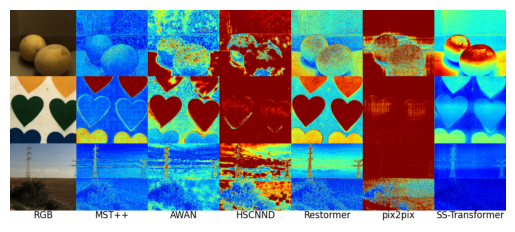

In [236]:
gt = []
gt.append(cv.cvtColor(cv.imread('figures/GT-RGB.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/MSTPlusPlus-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/AWAN-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/HSCNN_Plus-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/Restormer-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/pix2pix-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/SSTransformer-DELTAE.png'), cv.COLOR_BGR2RGB))
gts = cv.hconcat(gt)
gts = cv.vconcat([gts[21:, :, :], gts[:21, :, :]])
plt.imshow(gts)
plt.axis('off')
# plt.imshow(gts)
# plt.axis('off')
# plt.savefig('figures/SAM', bbox_inches='tight', pad_inches=0)
# plt.close()

In [237]:
bar = cv.cvtColor(cv.imread('heatmap/AWAN/ARAD-0-deltaE.png'), cv.COLOR_BGR2RGB)
# bar = cv.cvtColor(bar, cv.COLOR_BGR2RGB)
for i in range(bar.shape[0]):
    if bar[i,200,:].mean() != 255:
        h_min = i - 11
        break
for i in reversed(range(bar.shape[0])):
    if bar[i,200,:].mean() != 255:
        h_max = i + 12
        break
for i in range(bar.shape[1]):
    if bar[200,i + 500,:].mean() != 255:
        w_min = i + 490
        break
for i in reversed(range(bar.shape[1])):
    if bar[200,i,:].mean() != 255:
        w_max = i + 50
        break
bar = bar[h_min:h_max,w_min:w_max,:]

In [238]:
top, bottom, left, right = 10, 0, 0, 0
white = [255, 255, 255]
padded_img = cv.copyMakeBorder(gts, top, bottom, left, right, cv.BORDER_CONSTANT, value=white)
padded_bar = cv.copyMakeBorder(bar, bottom, top, left, right, cv.BORDER_CONSTANT, value=white)
gts = cv.hconcat([padded_img, padded_bar])
cv.imwrite('figures/DELTAE.png', cv.cvtColor(gts, cv.COLOR_RGB2BGR))
# plt.imshow(gts)
# plt.axis('off')
# plt.savefig('figures/SAM', bbox_inches='tight', pad_inches=0)
# plt.close()

True